<a href="https://colab.research.google.com/github/stutinarain/High-Risk-Pregnancy-Prediction-Model/blob/main/HRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Developing an AI Model for High-Risk Pregnancy Prediction

This project aims to develop an AI model for high-risk pregnancy (HRP) prediction which can significantly improve maternal health management in rural and underserved areas. This aligns with ZMQ's MIRA project's existing goal of early identification of HRPs and connecting women to public health centers for timely intervention, ultimately contributing to the reduction of maternal and infant mortality rates.


# I. Data Loading and Understanding

In this step we import the necessary libraries and analyze the given data to understand it better and figure out relations between different parameters.

In [345]:
#importing all the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
from difflib import SequenceMatcher
from textblob import TextBlob

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import os
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

#ignoring the warnings to keep the data clean
import warnings
warnings.filterwarnings("ignore")

In [346]:
#loading the excel file
xlsx_link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUCpowuTswiTnEoiawIr8SGlSTWjNxz4hqWdAt8y9eqHSUPAM5V3I5fStiQ3_gLw/pub?output=xlsx'

In [347]:
#reading the dataset
data = pd.read_excel(xlsx_link)

In [348]:
type(data)

pandas.core.frame.DataFrame

In [349]:
#number of rows and columns
data.shape

(999, 18)

In [350]:
#finding out the column names
data.columns

Index(['ANCC REGISTER', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [351]:
#starting five rows of the dataset
data.head()

,ANCC REGISTER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Name,Age,Gravida,TiTi Tika,গর্ভকাল,ওজন,উচ্চতা,রক্ত চাপ,রক্তস্বল্পতা,জন্ডিস,গর্ভস্হ শিশু অবস্থান,গর্ভস্হ শিশু নাড়াচাড়া,গর্ভস্হ শিশু হৃৎস্পন্দন,প্রসাব পরিক্ষা এলবুমিন,প্রসাব পরিক্ষা সুগার,VDRL,HRsAG,ঝুকিপূর্ণ গর্ভ
1,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
2,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
3,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
4,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes


In [352]:
#bottom five rows of the dataset
data.tail()

,ANCC REGISTER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
994,Rekha,22,1st,1st,20 week,49 kg,5.6'',90/60,NaN,NaN,Normal,Normal,150m,NaN,Yes,Positive,Negative,Yes
995,Akhi Moni,22,1st,2nd,30 week,45 kg,5.3'',110/80,NaN,NaN,Abnormal,Normal,140m,NaN,Yes,Negative,Negative,No
996,Puja,19,1st,3rd,30 week,50 kg,5.2'',100/70,NaN,NaN,Normal,Normal,140m,NaN,Yes,Positive,Negative,Yes
997,Shabnur,30,2nd,2nd,30 week,49 kg,5.1'',90/60,NaN,NaN,Normal,Normal,130m,NaN,Yes,Negative,Negative,Yes
998,Tayba,25,1st,1st,30 week,45 kg,5.0'',90/60,NaN,NaN,Abnormal,Normal,120m,NaN,Yes,Positive,Negative,Yes


In [353]:
#finding out the data type of each column
data.dtypes

,0
ANCC REGISTER,object
Unnamed: 1,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object
Unnamed: 5,object
Unnamed: 6,object
Unnamed: 7,object
Unnamed: 8,object
Unnamed: 9,object


# II. Data Preprocessing and Feature Engineering
This is an important step wherein we prepare our data before training our model on it. This ensures the accuracy, completeness, and relevance of our data for analysis and machine learning models. It involves several processes:

1. Data Cleaning

This involves handling NULL values, duplicate values, outliers and changing column names for better understanding.



In [354]:
#changing the columnn names for better understanding
data.columns = ['Name', 'Age', 'Gravida', 'TiTi Tika', 'Gestational Age, weeks', 'Weight, kg', 'Height, ft','Blood Pressure',
                'Anemia', 'Jaundice', 'Fetal Position', 'Fetal Movements', 'Fetal Heartbeat,m','Urine Test Albumin', 'Urine Test Sugar',
                'VDRL', 'HRsAG', 'High-Risk Pregnancy']

In [355]:
data

,Name,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg","Height, ft",Blood Pressure,Anemia,Jaundice,Fetal Position,Fetal Movements,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy
0,Name,Age,Gravida,TiTi Tika,গর্ভকাল,ওজন,উচ্চতা,রক্ত চাপ,রক্তস্বল্পতা,জন্ডিস,গর্ভস্হ শিশু অবস্থান,গর্ভস্হ শিশু নাড়াচাড়া,গর্ভস্হ শিশু হৃৎস্পন্দন,প্রসাব পরিক্ষা এলবুমিন,প্রসাব পরিক্ষা সুগার,VDRL,HRsAG,ঝুকিপূর্ণ গর্ভ
1,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
2,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
3,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
4,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Rekha,22,1st,1st,20 week,49 kg,5.6'',90/60,NaN,NaN,Normal,Normal,150m,NaN,Yes,Positive,Negative,Yes
995,Akhi Moni,22,1st,2nd,30 week,45 kg,5.3'',110/80,NaN,NaN,Abnormal,Normal,140m,NaN,Yes,Negative,Negative,No
996,Puja,19,1st,3rd,30 week,50 kg,5.2'',100/70,NaN,NaN,Normal,Normal,140m,NaN,Yes,Positive,Negative,Yes
997,Shabnur,30,2nd,2nd,30 week,49 kg,5.1'',90/60,NaN,NaN,Normal,Normal,130m,NaN,Yes,Negative,Negative,Yes


In [356]:
#dropping the first row of the dataset
data = data.drop(0)

In [357]:
data

,Name,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg","Height, ft",Blood Pressure,Anemia,Jaundice,Fetal Position,Fetal Movements,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy
1,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
2,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
3,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
4,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes
5,Tania Akter,20,1st,2nd,30 week,53 kg,5.2'',100/55,NaN,NaN,Normal,Normal,125m,NaN,Yes,Negative,Negative,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Rekha,22,1st,1st,20 week,49 kg,5.6'',90/60,NaN,NaN,Normal,Normal,150m,NaN,Yes,Positive,Negative,Yes
995,Akhi Moni,22,1st,2nd,30 week,45 kg,5.3'',110/80,NaN,NaN,Abnormal,Normal,140m,NaN,Yes,Negative,Negative,No
996,Puja,19,1st,3rd,30 week,50 kg,5.2'',100/70,NaN,NaN,Normal,Normal,140m,NaN,Yes,Positive,Negative,Yes
997,Shabnur,30,2nd,2nd,30 week,49 kg,5.1'',90/60,NaN,NaN,Normal,Normal,130m,NaN,Yes,Negative,Negative,Yes


In [358]:
#display DataFrame information, including column names, non-null counts, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 1 to 998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    998 non-null    object
 1   Age                     998 non-null    object
 2   Gravida                 998 non-null    object
 3   TiTi Tika               998 non-null    object
 4   Gestational Age, weeks  998 non-null    object
 5   Weight, kg              998 non-null    object
 6   Height, ft              998 non-null    object
 7   Blood Pressure          998 non-null    object
 8   Anemia                  123 non-null    object
 9   Jaundice                12 non-null     object
 10  Fetal Position          998 non-null    object
 11  Fetal Movements         998 non-null    object
 12  Fetal Heartbeat,m       998 non-null    object
 13  Urine Test Albumin      134 non-null    object
 14  Urine Test Sugar        998 non-null    object
 15  VDRL  

In [359]:
#finding the unique values of Anemia column
data.Anemia.unique()

array([nan, 'Minimal', 'Medium'], dtype=object)

In [360]:
#total null values in each column
data.isna().sum()

,0
Name,0
Age,0
Gravida,0
TiTi Tika,0
"Gestational Age, weeks",0
"Weight, kg",0
"Height, ft",0
Blood Pressure,0
Anemia,875
Jaundice,986


Observations:

We can see here that the columns Anemia, Jaundice and Urine Test Albumin contain several NULL values.

In [361]:
#finding the unique values of Urine Test Albumin column
data['Urine Test Albumin'].unique()

array([nan, 'Higher', 'Minimal', 'Medium'], dtype=object)

Checking non-null values in each column




<Axes: >

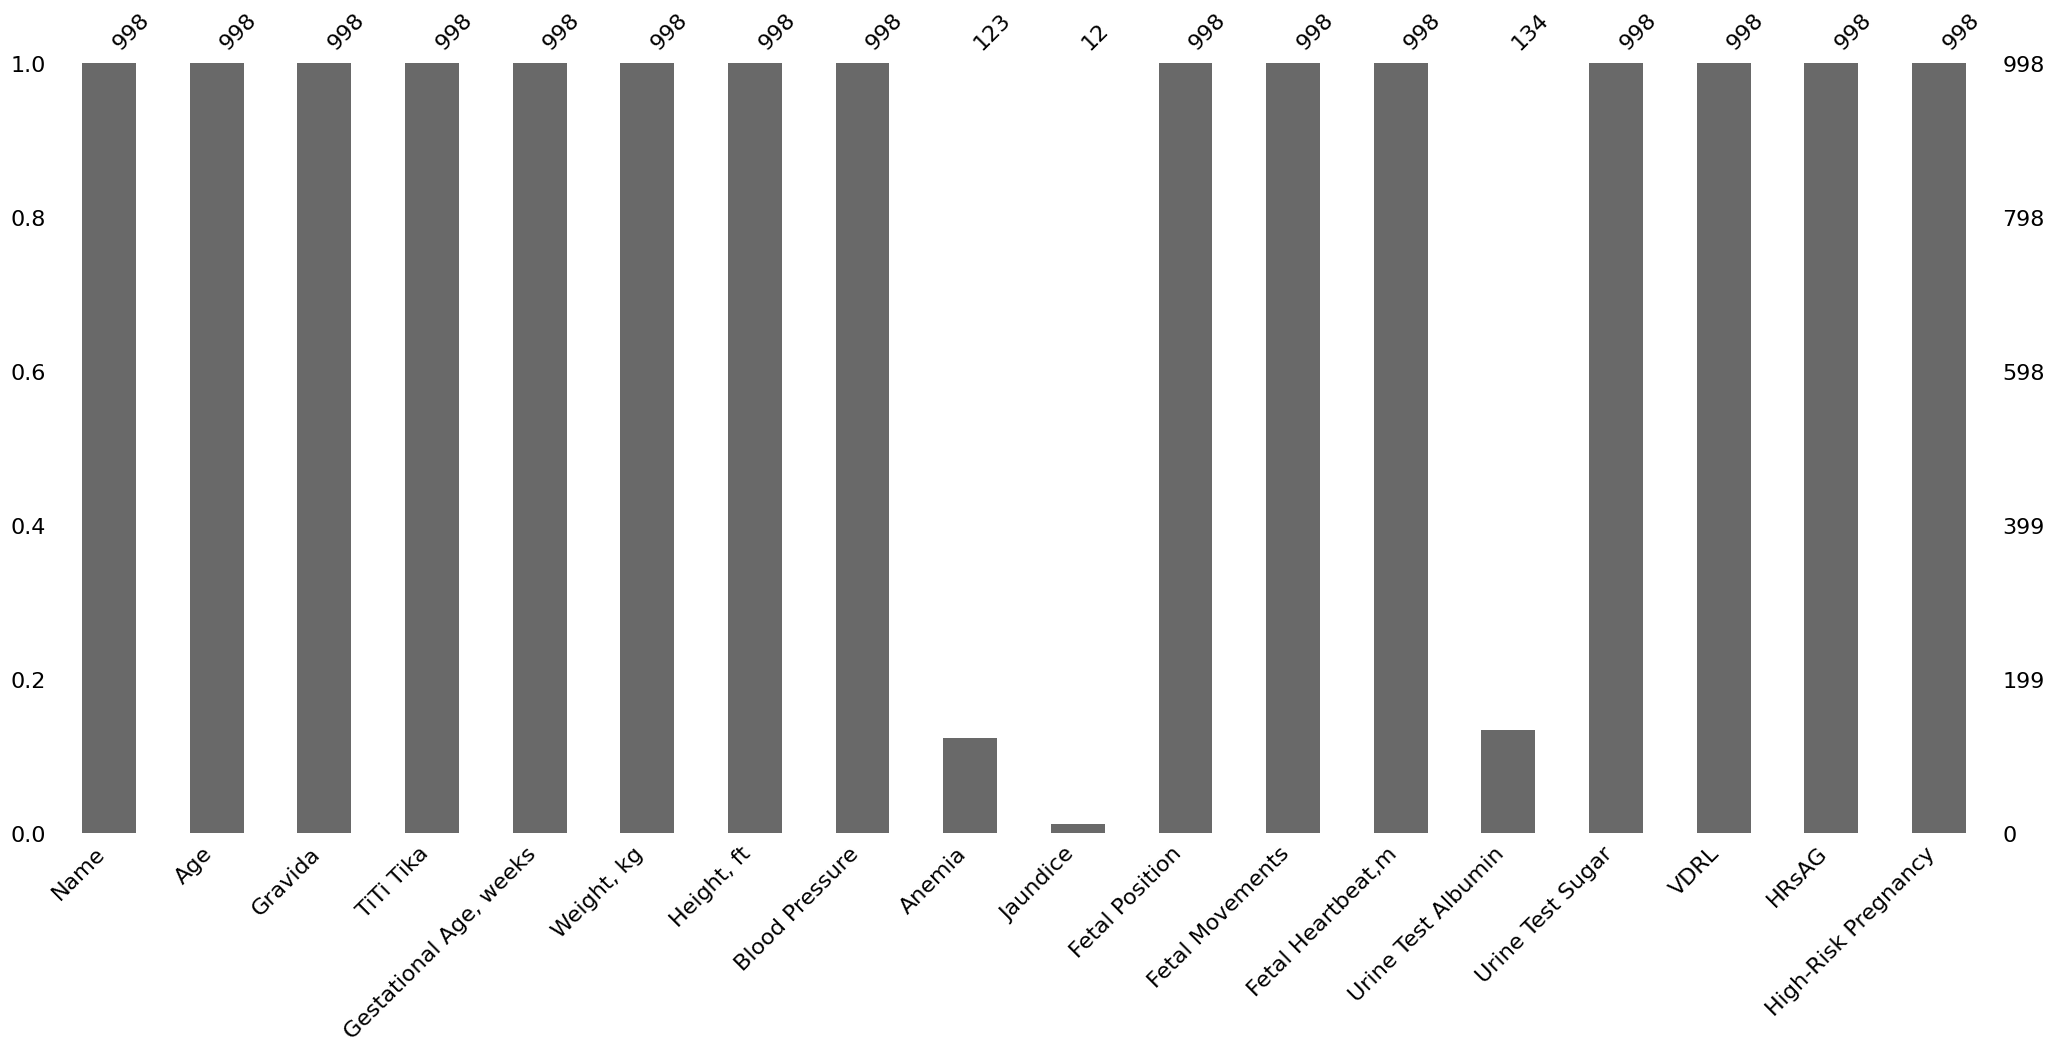

In [362]:
msno.bar(data)

In [363]:
#adding values to null values in the three columns
data[['Anemia', 'Jaundice', 'Urine Test Albumin']] = data[['Anemia', 'Jaundice', 'Urine Test Albumin']].fillna('Not found')

In [364]:
data.Jaundice.unique()

array(['Not found', 'Minimal', 'Medium'], dtype=object)

In [365]:
data.Gravida.unique()

array(['1st', '2nd', '3rd'], dtype=object)

Plotting graphs for better understanding

<Axes: xlabel='High-Risk Pregnancy', ylabel='count'>

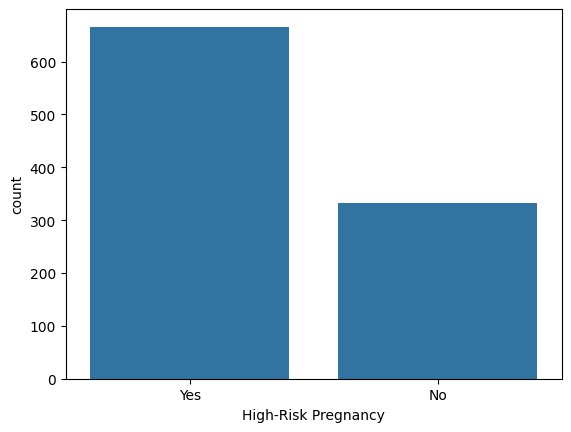

In [366]:
sns.countplot(x = data["High-Risk Pregnancy"]) # there will be count on y axis automatically

<Axes: xlabel='Age', ylabel='count'>

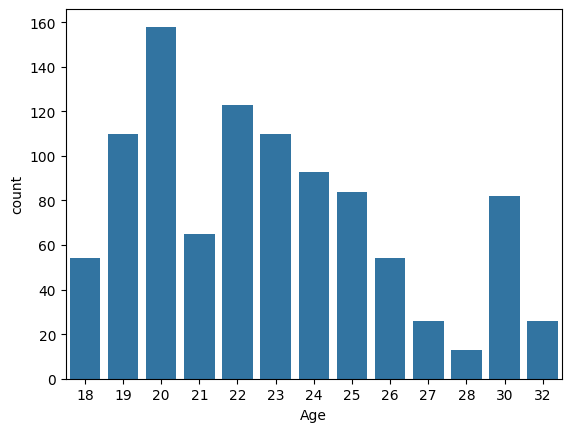

In [367]:
sns.countplot(x = data["Age"])

2. Converting objects to integer values


In [368]:
#here we made a copy of the original data which have named as data_clean. This is done so as to prevent making any changes to the original dataset
data_clean = data.copy()

In this step, we are converting all the values into integer values as it will be easier for our Machine Learning model to work upon

In [369]:
data_clean['Gravida'] = data_clean['Gravida'].str.extract('(\d+)').astype(int)  # Gravida to integers
data_clean['TiTi Tika'] = data_clean['TiTi Tika'].str.extract('(\d+)').astype(int)  # TiTi Tika to integers
data_clean['Gestational Age, weeks'] = data_clean['Gestational Age, weeks'].str.replace(' week', '').astype(int)  # Gestational Age to integers
data_clean['Weight, kg'] = data_clean['Weight, kg'].str.replace(' kg', '').astype(int)  # Weight to integers
data_clean['Fetal Heartbeat,m'] = data_clean['Fetal Heartbeat,m'].str.replace('m', '').astype(int)  # Fetal Heartbeat to integers
data_clean['Height, ft'] = data_clean['Height, ft'].str.replace("''", '').astype(float)  # Height to floats
data_clean['Height, cm'] = round(data_clean['Height, ft'] * 30.48, 2)


This is an important step of Feature Engineering. Here, we are splitting the Blood Pressure column into two different columns with separate integer values as our ML model cannot recognize values like 100/60. Instead, we'll make two columns, Systolic and Diastolic pressure which will store the respective values of 100 and 60.

In [370]:
data_clean[['Systolic', 'Diastolic']] = data_clean['Blood Pressure'].str.split('/', expand=True)  # Split Blood Pressure
data_clean['Systolic'] = data_clean['Systolic'].astype(int)
data_clean['Diastolic'] = data_clean['Diastolic'].astype(int)

In [371]:
data_clean.head()

,Name,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg","Height, ft",Blood Pressure,Anemia,Jaundice,...,Fetal Movements,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
1,Rituporna,18,1,1,38,50,5.3,100/60,Not found,Not found,...,Normal,140,Not found,Yes,Negative,Negative,Yes,161.54,100,60
2,Moina,25,2,2,38,60,5.2,100/70,Not found,Not found,...,Normal,130,Not found,Yes,Positive,Negative,No,158.50,100,70
3,Rabeya,20,1,1,30,55,5.0,100/60,Not found,Not found,...,Normal,120,Not found,Yes,Negative,Negative,Yes,152.40,100,60
4,Shorna,22,1,3,35,51,5.4,110/65,Not found,Not found,...,Normal,130,Not found,Yes,Positive,Negative,Yes,164.59,110,65
5,Tania Akter,20,1,2,30,53,5.2,100/55,Not found,Not found,...,Normal,125,Not found,Yes,Negative,Negative,No,158.50,100,55


 Analyzing null values

In [372]:
def calculate_quality_metrics(data):
    metrics = {}
    metrics['Missed values'] = data.isna().sum()
    metrics['% of missed values'] = data.isna().mean() * 100
    metrics['Unique values'] = data.nunique()
    metrics['Duplicates'] = data.duplicated().sum()
    return pd.DataFrame(metrics)

In [373]:
#analyzing total null values, their percentage, unique values and duplicate values
calculate_quality_metrics(data_clean)

,Missed values,% of missed values,Unique values,Duplicates
Name,0,0.0,350,0
Age,0,0.0,13,0
Gravida,0,0.0,3,0
TiTi Tika,0,0.0,3,0
"Gestational Age, weeks",0,0.0,11,0
"Weight, kg",0,0.0,14,0
"Height, ft",0,0.0,7,0
Blood Pressure,0,0.0,11,0
Anemia,0,0.0,3,0
Jaundice,0,0.0,3,0


In [374]:
#making a new copy of the clean dataset
data_1 =data_clean.copy()

In [375]:
#dropping columns which are not important
columns_to_drop = ['Name', 'Fetal Movements', 'Height, ft', 'Blood Pressure']
data_final = data_1.drop(columns_to_drop, axis =1).reset_index(drop=True)

In [376]:
data_final.head()

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,Jaundice,Fetal Position,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,Not found,Not found,Normal,140,Not found,Yes,Negative,Negative,Yes,161.54,100,60
1,25,2,2,38,60,Not found,Not found,Normal,130,Not found,Yes,Positive,Negative,No,158.50,100,70
2,20,1,1,30,55,Not found,Not found,Normal,120,Not found,Yes,Negative,Negative,Yes,152.40,100,60
3,22,1,3,35,51,Not found,Not found,Normal,130,Not found,Yes,Positive,Negative,Yes,164.59,110,65
4,20,1,2,30,53,Not found,Not found,Normal,125,Not found,Yes,Negative,Negative,No,158.50,100,55


In [377]:
data_final.columns

Index(['Age', 'Gravida', 'TiTi Tika', 'Gestational Age, weeks', 'Weight, kg',
       'Anemia', 'Jaundice', 'Fetal Position', 'Fetal Heartbeat,m',
       'Urine Test Albumin', 'Urine Test Sugar', 'VDRL', 'HRsAG',
       'High-Risk Pregnancy', 'Height, cm', 'Systolic', 'Diastolic'],
      dtype='object')

In [378]:
data_encoded = data_final.copy()

In [379]:
columns_to_transform = ['Anemia', 'Jaundice','Fetal Position', 'Urine Test Albumin', 'Urine Test Sugar', 'VDRL', 'HRsAG', 'High-Risk Pregnancy']

IN this step, textual data is converted to numerical data to depict the severity of each column in numbers. For example, Not found = 0, Minimal = 1 etc. Similarly, No is encoded to 0 while Yes is encoded to 1.

In [380]:
# Mapping for  OrdinalEncoder
category_mapping = {}
for e in columns_to_transform:
    list_of_values = data_encoded[e].unique()
    if e == 'Urine Test Albumin':
        list_of_values = ['Not found', 'Minimal', 'Medium', 'Higher']
    if e == 'Urine Test Sugar':
        list_of_values = ['No', 'Yes']
    if e == 'High-Risk Pregnancy':
        list_of_values = ['No', 'Yes']
    category_mapping[e] = list_of_values


In [381]:
#unmique values of each category
category_mapping

{'Anemia': array(['Not found', 'Minimal', 'Medium'], dtype=object),
 'Jaundice': array(['Not found', 'Minimal', 'Medium'], dtype=object),
 'Fetal Position': array(['Normal', 'Abnormal'], dtype=object),
 'Urine Test Albumin': ['Not found', 'Minimal', 'Medium', 'Higher'],
 'Urine Test Sugar': ['No', 'Yes'],
 'VDRL': array(['Negative', 'Positive'], dtype=object),
 'HRsAG': array(['Negative', 'Positive'], dtype=object),
 'High-Risk Pregnancy': ['No', 'Yes']}

In [382]:
for column in columns_to_transform:
    encoder = OrdinalEncoder(categories=[category_mapping[column]])
    data_encoded[column] = encoder.fit_transform(data_encoded[[column]])

In [383]:
data_encoded.head()

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,Jaundice,Fetal Position,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,0.0,0.0,0.0,140,0.0,1.0,0.0,0.0,1.0,161.54,100,60
1,25,2,2,38,60,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,0.0,158.50,100,70
2,20,1,1,30,55,0.0,0.0,0.0,120,0.0,1.0,0.0,0.0,1.0,152.40,100,60
3,22,1,3,35,51,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,1.0,164.59,110,65
4,20,1,2,30,53,0.0,0.0,0.0,125,0.0,1.0,0.0,0.0,0.0,158.50,100,55


3. Checking if our data is balanced

In this step, we'll count the number of unique values in each column to see if our data is balanced or not.

In [384]:
X1 = data_encoded['High-Risk Pregnancy']
X1.value_counts()

,count
High-Risk Pregnancy,
1.0,666
0.0,332


In [385]:
X2 = data_encoded['Anemia']
X2.value_counts()

,count
Anemia,
0.0,875
1.0,62
2.0,61


In [386]:
X3 = data_encoded['Jaundice']
X3.value_counts()

,count
Jaundice,
0.0,986
1.0,8
2.0,4


In [387]:
X4 = data_encoded['Fetal Position']
X4.value_counts()

,count
Fetal Position,
0.0,992
1.0,6


In [388]:
X5 = data_encoded['Urine Test Albumin']
X5.value_counts()

,count
Urine Test Albumin,
0.0,864
2.0,48
3.0,44
1.0,42


In [389]:
X6 = data_encoded['Urine Test Sugar']
X6.value_counts()

,count
Urine Test Sugar,
1.0,890
0.0,108


In [390]:
X7 = data_encoded['VDRL']
X7.value_counts()

,count
VDRL,
0.0,499
1.0,499


In [391]:
X8 = data_encoded['HRsAG']
X8.value_counts()

,count
HRsAG,
0.0,889
1.0,109


In [392]:
#dropping the columns of Jaundice and Fetal Positiona as they are not that important
data_encoded.drop(columns = ['Jaundice', 'Fetal Position'])

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,0.0,140,0.0,1.0,0.0,0.0,1.0,161.54,100,60
1,25,2,2,38,60,0.0,130,0.0,1.0,1.0,0.0,0.0,158.50,100,70
2,20,1,1,30,55,0.0,120,0.0,1.0,0.0,0.0,1.0,152.40,100,60
3,22,1,3,35,51,0.0,130,0.0,1.0,1.0,0.0,1.0,164.59,110,65
4,20,1,2,30,53,0.0,125,0.0,1.0,0.0,0.0,0.0,158.50,100,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,22,1,1,20,49,0.0,150,0.0,1.0,1.0,0.0,1.0,170.69,90,60
994,22,1,2,30,45,0.0,140,0.0,1.0,0.0,0.0,0.0,161.54,110,80
995,19,1,3,30,50,0.0,140,0.0,1.0,1.0,0.0,1.0,158.50,100,70
996,30,2,2,30,49,0.0,130,0.0,1.0,0.0,0.0,1.0,155.45,90,60


# III. Exploratory Data Analysis

In this step, we'll understand the characteristics of the dataset with visualization tools. This will help us gain insight and see the trends of different columns and find out where our core problem lies.

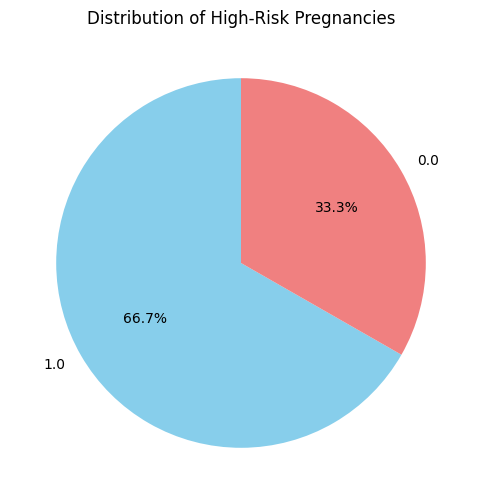

In [393]:
#pie chart for high-risk pregnancy distribution
plt.figure(figsize=(8, 6))
data_encoded['High-Risk Pregnancy'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of High-Risk Pregnancies')
plt.ylabel('')
plt.show()

According to this pie chart, 66.7% of the pregnancies in this dataset have been classifies as High-Risk, while the remaining 33.3% of the pregnancies are not classified as High-Risk. This shows us that our dataset is imbalanced and cause the model to have bias towards the majority class.

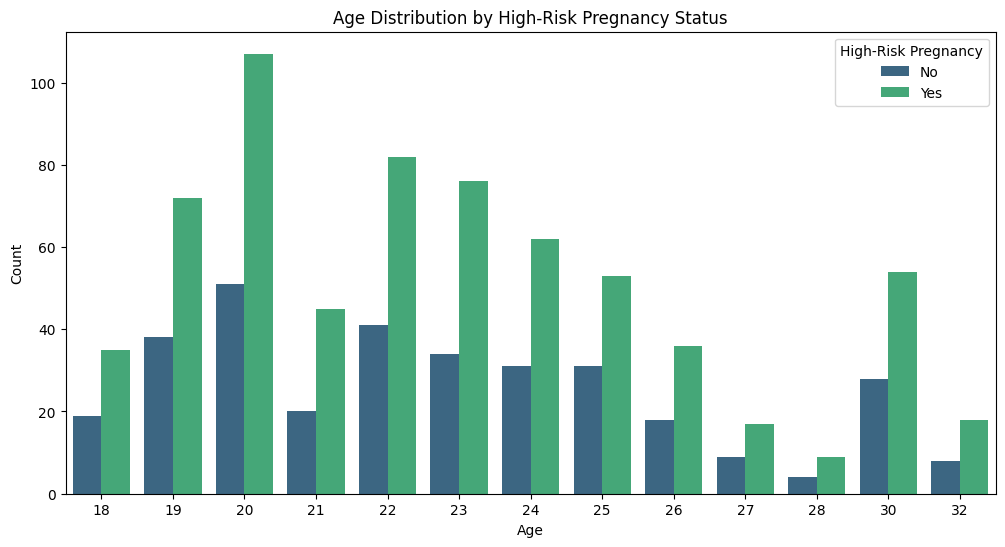

In [394]:
#Age vs. HRP
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='Age', hue='High-Risk Pregnancy', palette='viridis')
plt.title('Age Distribution by High-Risk Pregnancy Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='High-Risk Pregnancy', labels=['No', 'Yes'])
plt.show()

According to the bar graph, the higher number of high-risk pregnancies is concentrated in the younger age groups. The highest HRPs is observed in the age group of 18-25, most of them in the age group of 20.

There is also a decrease in HRPs as the age increases. This suggests that younger maternal age is a significant factor associated with high-risk pregnancies in this particular dataset.

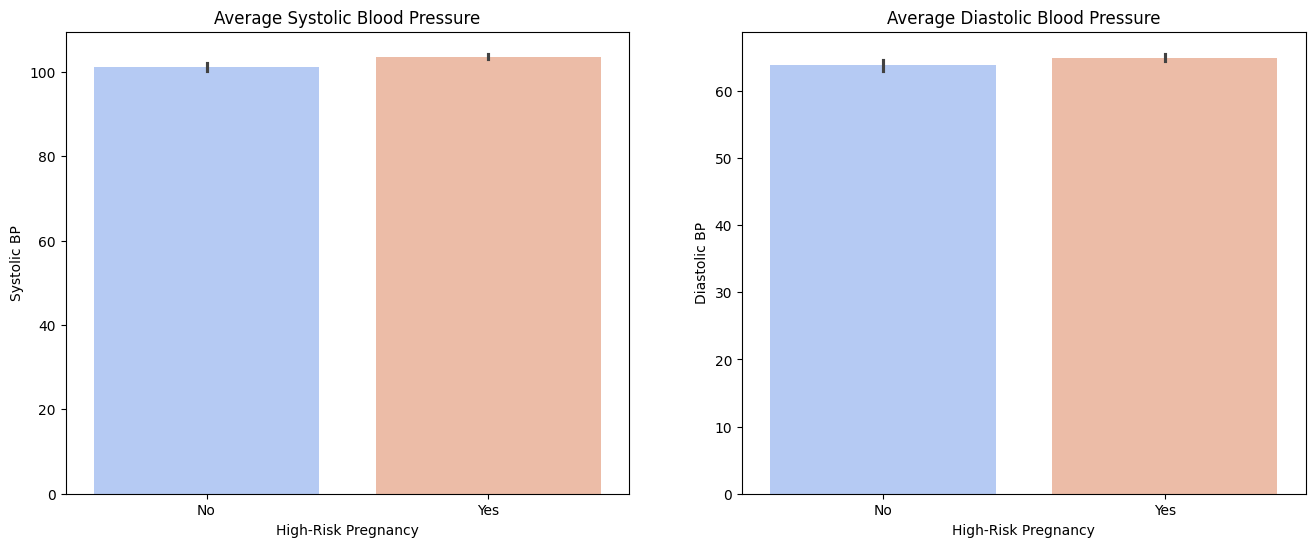

In [395]:
#blood pressure vs. HRP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=data_encoded, x='High-Risk Pregnancy', y='Systolic', ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Systolic Blood Pressure')
axes[0].set_xlabel('High-Risk Pregnancy')
axes[0].set_ylabel('Systolic BP')
axes[0].set_xticklabels(['No', 'Yes'])


sns.barplot(data=data_encoded, x='High-Risk Pregnancy', y='Diastolic', ax=axes[1], palette='coolwarm')
axes[1].set_title('Average Diastolic Blood Pressure')
axes[1].set_xlabel('High-Risk Pregnancy')
axes[1].set_ylabel('Diastolic BP')
axes[1].set_xticklabels(['No', 'Yes'])

plt.show()

It can be seen that in both systolic and diastolic blood pressure, the values appear to be, on average, slightly higher in the high-risk pregnancy group as compared to the non-high-risk group. This suggests that blood pressure is a main parameter in determining high-risk pregnancies.

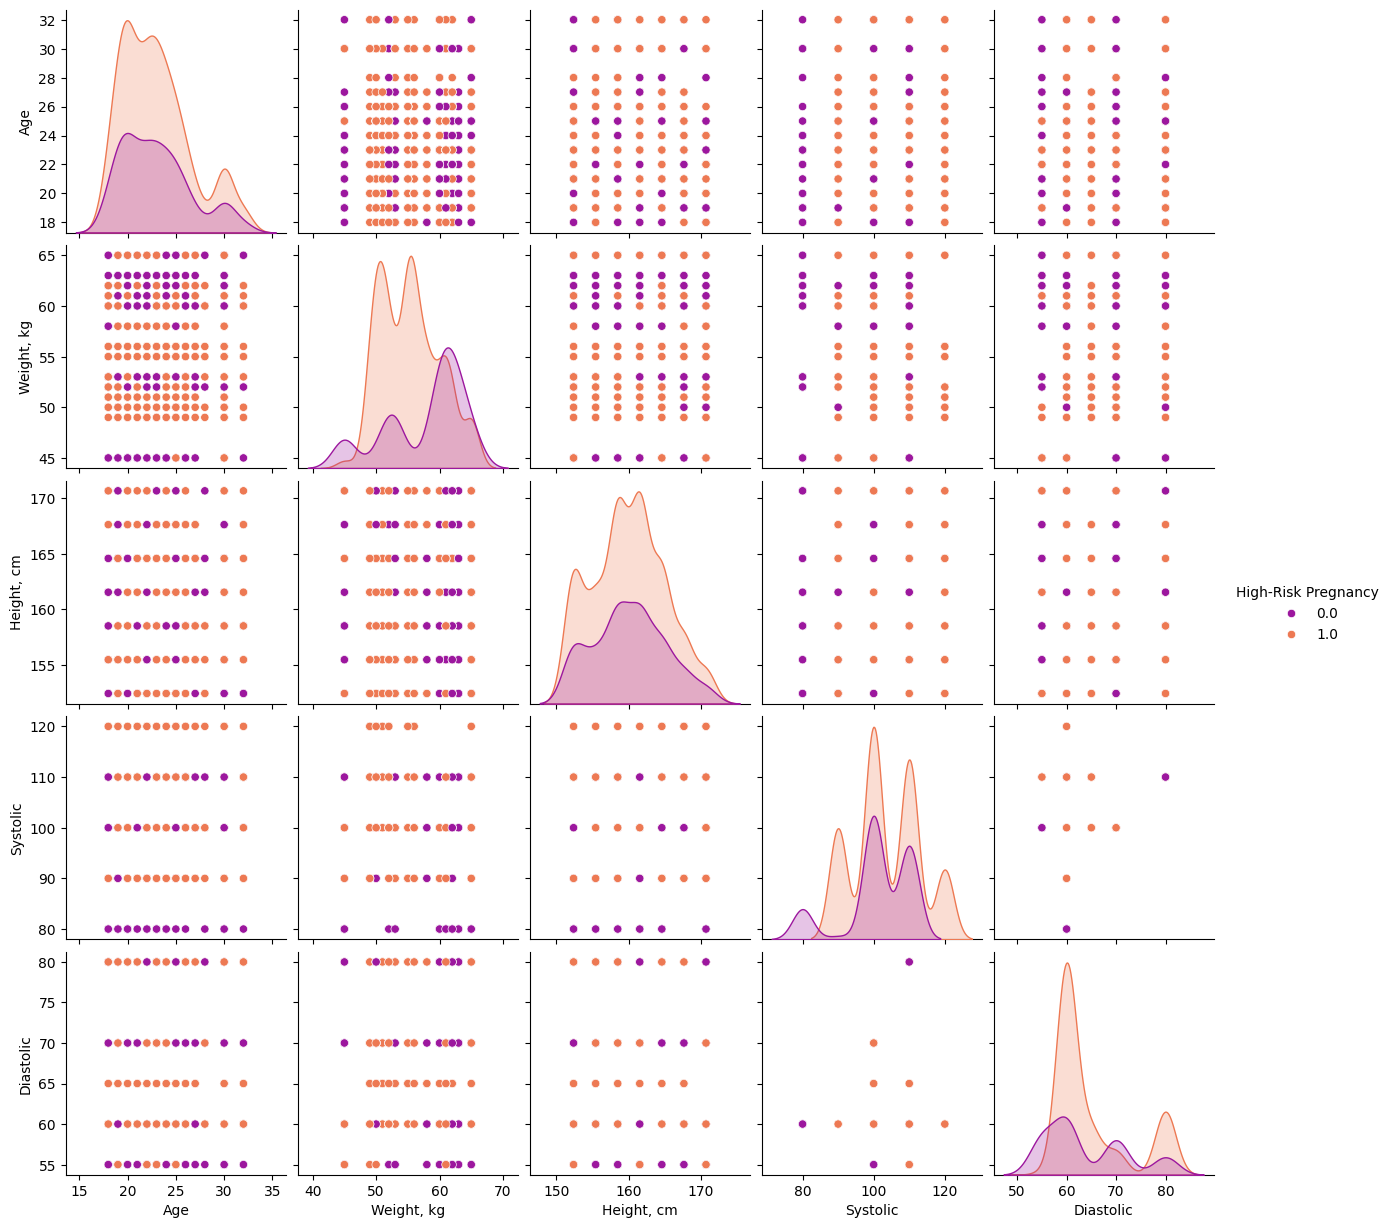

In [396]:
#pairplot of numerical features
numerical_features = ['Age', 'Weight, kg', 'Height, cm', 'Systolic', 'Diastolic', 'High-Risk Pregnancy']
sns.pairplot(data_encoded[numerical_features], hue='High-Risk Pregnancy', palette='plasma')
plt.show()

With the help of a pairplot, we can understand the relation between multiple variables at once. It consists of both scatterplots and histograms. This can help us how each column correlates with each other and understand our data better.

<Axes: >

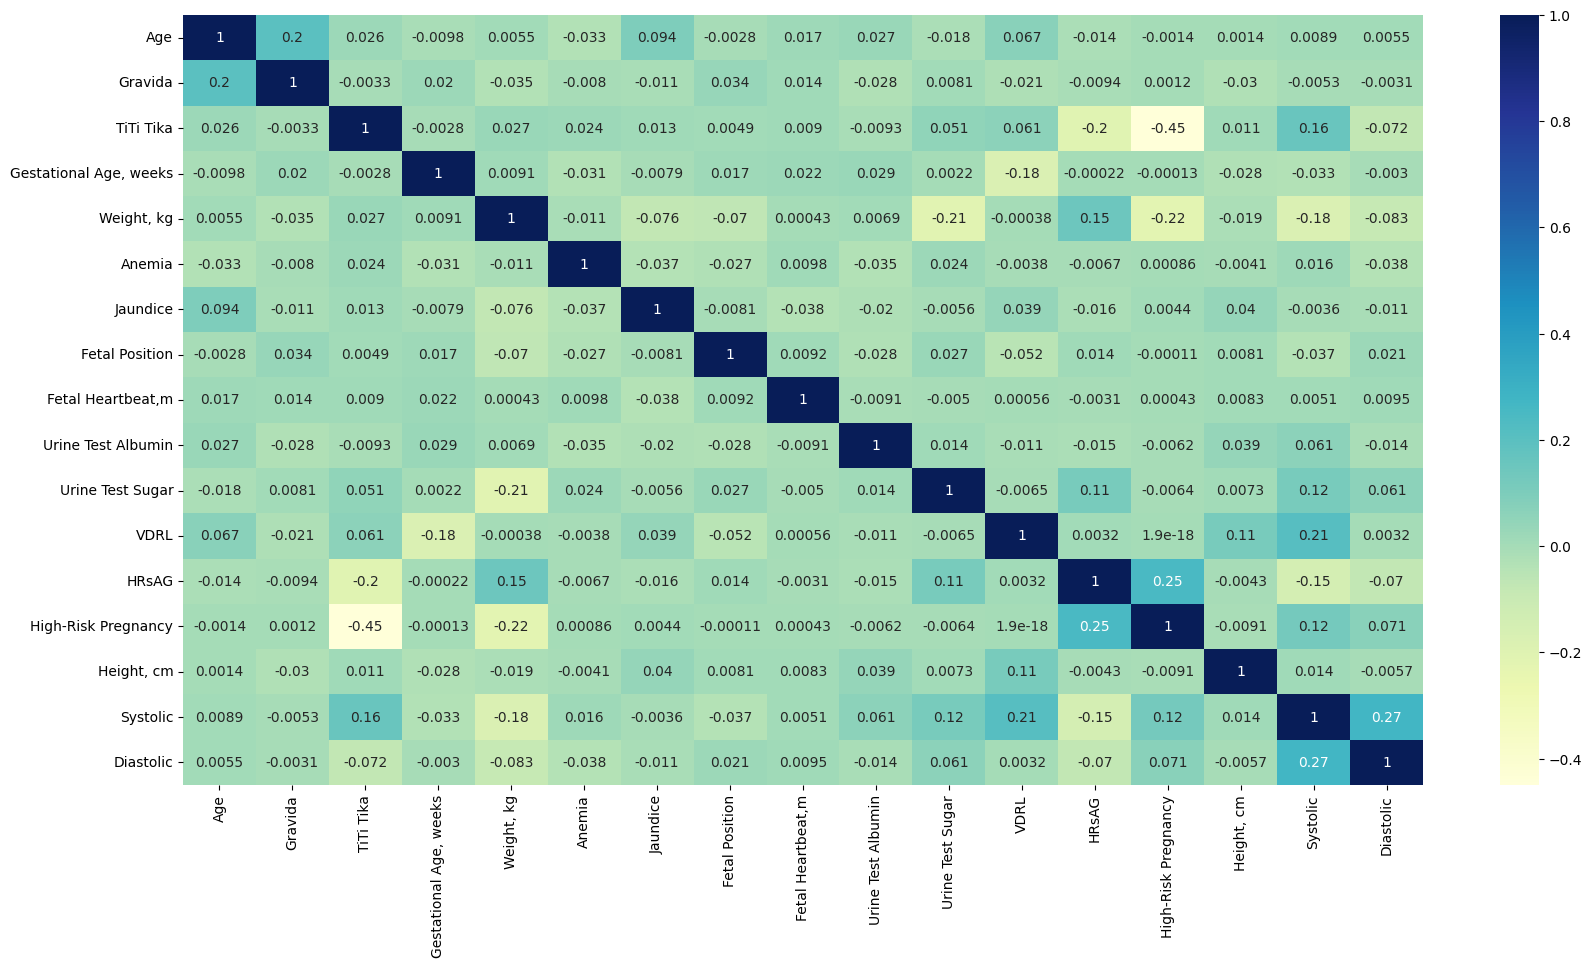

In [397]:
#heatmap of all the columns
plt.figure(figsize = (20,10))
sns.heatmap(data_encoded.corr(), annot = True, cmap = "YlGnBu")

The heatmap provides the correlation between each variable. It shows us how strongly the variables depend on each other and shows the correlation as negative and positive. For example, high-risk pregnancy has a strong relation with both systolic and diastolic pressure but has a weak dependency on height.

# IV. Model Building

In this step, we have first split the training and testing data to 80:20 ratio. Then we have trained our data on three models:

1. Linear Regression Model
2. Random Forest Regressor
3. Random Forest Classifier

We will be using the model with the highest accuracy.

1. Linear Regression Model

In [398]:
#importing training and testing library
from sklearn.model_selection import train_test_split

#defining the axes
X = data_encoded.drop(['High-Risk Pregnancy'], axis = 1)
y = data_encoded['High-Risk Pregnancy']

In [399]:
X

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,Jaundice,Fetal Position,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,0.0,0.0,0.0,140,0.0,1.0,0.0,0.0,161.54,100,60
1,25,2,2,38,60,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,158.50,100,70
2,20,1,1,30,55,0.0,0.0,0.0,120,0.0,1.0,0.0,0.0,152.40,100,60
3,22,1,3,35,51,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,164.59,110,65
4,20,1,2,30,53,0.0,0.0,0.0,125,0.0,1.0,0.0,0.0,158.50,100,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,22,1,1,20,49,0.0,0.0,0.0,150,0.0,1.0,1.0,0.0,170.69,90,60
994,22,1,2,30,45,0.0,0.0,1.0,140,0.0,1.0,0.0,0.0,161.54,110,80
995,19,1,3,30,50,0.0,0.0,0.0,140,0.0,1.0,1.0,0.0,158.50,100,70
996,30,2,2,30,49,0.0,0.0,0.0,130,0.0,1.0,0.0,0.0,155.45,90,60


In [400]:
y

,High-Risk Pregnancy
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
993,1.0
994,0.0
995,1.0
996,1.0


In [401]:
#splitting the data set into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [402]:
#importing linear regressor model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [403]:
#training set
X_train.shape, y_train.shape

((798, 16), (798,))

In [404]:
#testing set
X_test.shape, y_test.shape

((200, 16), (200,))

In [405]:
#accuracy of the model
reg.score(X_test, y_test)

0.2973619541457593

In [406]:
#scaling the model top see if we'll get a better accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_s, y_train)

reg.score(X_test_s, y_test)

0.2973619541457593

We get 29.7% accuracy using the linear regression model. Even after scaling the parameters, there is no improvement in accuracy of the model.

 2. Random Forest Regressor




In [407]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [408]:
#accuracy of the model
forest.score(X_test, y_test)

0.8209069658719027

Using random forest regressor, we get 82% accuracy.

3. Random Forest Classifier

In [409]:
#importing the random forest classifier model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [410]:
#accuracy of the model
print(clf.score(X_test, y_test))

0.955


Using random forest classifier, we get the best accuracy so far which is 95.5%.

# V. Deploying the Model using Streamlit

We will deploy the model using streamlit application.

In [411]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'high_risk_pregnancy_model.pkl')

['high_risk_pregnancy_model.pkl']

In [412]:
#installing streamlit
!pip install streamlit

In [413]:
#writefile app.py
import streamlit as st

# Load the trained model
model = joblib.load('high_risk_pregnancy_model.pkl')

def predict_risk(features):
    # The model expects a 2D array, so we reshape the input
    prediction = model.predict(np.array(features).reshape(1, -1))
    return prediction[0]

def main():
    st.title('High-Risk Pregnancy Prediction')
    st.write('Enter the patient\'s details to predict the risk of a high-risk pregnancy.')

    # Create input fields for all the features
    age = st.number_input('Age', min_value=10, max_value=60, value=25)
    gravida = st.number_input('Gravida (Number of Pregnancies)', min_value=0, max_value=20, value=1)
    titi_tika = st.number_input('TiTi Tika', min_value=0, max_value=5, value=1)
    gestational_age = st.number_input('Gestational Age (weeks)', min_value=10, max_value=50, value=30)
    weight = st.number_input('Weight (kg)', min_value=30.0, max_value=150.0, value=60.0)
    anemia = st.selectbox('Anemia', ['Not found', 'Minimal', 'Medium'])
    jaundice = st.selectbox('Jaundice', ['Not found', 'Minimal', 'Medium'])
    fetal_position = st.selectbox('Fetal Position', ['Normal', 'Abnormal'])
    fetal_heartbeat = st.number_input('Fetal Heartbeat (bpm)', min_value=60, max_value=200, value=140)
    urine_albumin = st.selectbox('Urine Test Albumin', ['Not found', 'Minimal', 'Medium', 'Higher'])
    urine_sugar = st.selectbox('Urine Test Sugar', ['No', 'Yes'])
    vdrl = st.selectbox('VDRL', ['Negative', 'Positive'])
    hrsag = st.selectbox('HRsAG', ['Negative', 'Positive'])
    height = st.number_input('Height (cm)', min_value=100.0, max_value=200.0, value=160.0)
    systolic = st.number_input('Systolic Blood Pressure', min_value=70, max_value=200, value=120)
    diastolic = st.number_input('Diastolic Blood Pressure', min_value=40, max_value=120, value=80)

    # Convert categorical features to numerical values
    anemia_map = {'Not found': 0, 'Minimal': 1, 'Medium': 2}
    jaundice_map = {'Not found': 0, 'Minimal': 1, 'Medium': 2}
    fetal_position_map = {'Normal': 0, 'Abnormal': 1}
    urine_albumin_map = {'Not found': 0, 'Minimal': 1, 'Medium': 2, 'Higher': 3}
    urine_sugar_map = {'No': 0, 'Yes': 1}
    vdrl_map = {'Negative': 0, 'Positive': 1}
    hrsag_map = {'Negative': 0, 'Positive': 1}

    anemia_encoded = anemia_map[anemia]
    jaundice_encoded = jaundice_map[jaundice]
    fetal_position_encoded = fetal_position_map[fetal_position]
    urine_albumin_encoded = urine_albumin_map[urine_albumin]
    urine_sugar_encoded = urine_sugar_map[urine_sugar]
    vdrl_encoded = vdrl_map[vdrl]
    hrsag_encoded = hrsag_map[hrsag]


    if st.button('Predict'):
        features = [age, gravida, titi_tika, gestational_age, weight, anemia_encoded, jaundice_encoded, fetal_position_encoded,
                   fetal_heartbeat, urine_albumin_encoded, urine_sugar_encoded, vdrl_encoded, hrsag_encoded, height, systolic, diastolic]
        result = predict_risk(features)
        if result == 1:
            st.error('Prediction: High-Risk Pregnancy')
        else:
            st.success('Prediction: Not a High-Risk Pregnancy')

if __name__ == '__main__':
    main()

2025-07-30 15:52:05.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:52:05.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [414]:
!pip install pyngrok

In [415]:
import pyngrok
import streamlit

In [416]:
from pyngrok import ngrok

# Replace "YOUR_AUTHTOKEN" with your actual authtoken
ngrok.set_auth_token("30bF6hSiVAdLZn4wbrPE4PBCvOh_3dKhvQcNKgxgrsNdQkaAA")

In [419]:
from pyngrok import ngrok
import subprocess
import time

# Disconnect any existing tunnels
ngrok.kill()

# Start the Streamlit app in the background
process = subprocess.Popen(["streamlit", "run", "app.py"])

# Wait for a few seconds to give the app time to start
time.sleep(5)

# Get the public URL from ngrok
public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://6a88fe253bb2.ngrok-free.app" -> "http://localhost:8501"
